In [34]:
import retinanalysis as ra
import pandas as pd
import numpy as np
# import xarray as xr
ra.settings.mea_config
import matplotlib.pyplot as plt
# ra.database_pop.reload_celltypefiles()
# ra.database_utils.populate_database()

# import sys
# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import response, analysis_chunk
# import importlib
# importlib.reload(response)
# importlib.reload(analysis_chunk)

# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import ei_utils as eiu
# import importlib
# importlib.reload(eiu)

In [5]:
df = ra.get_datasets_from_protocol_names('protocols.spatialnoise')
df[df.exp_name=='20250514C']


Found 2 protocols matching "protocols.spatialnoise":
['manookinlab.protocols.SpatialNoise'
 'manookinlab.protocols.SpatialNoiseAndMotion']
No epochs found for block 2372

Found 45 experiments, 199 epoch blocks.



,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
175,20250514C,data000,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20250514C/data000,Spatial Noise,138,3,2438,3659,499
176,20250514C,data001,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20250514C/data001,Spatial Noise,138,3,2438,3660,499
177,20250514C,data006,0.5,chunk2,manookinlab.protocols.SpatialNoise,1,20250514C/data006,Spatial Noise 30 R*,138,3,2443,3665,500
178,20250514C,data010,0.5,chunk3,manookinlab.protocols.SpatialNoise,1,20250514C/data010,noise photopic,138,3,2447,3669,506


In [33]:
idxs = [175]
s1 = ra.StimBlock(df.at[idxs[0], 'exp_name'], df.at[idxs[0], 'datafile_name'])
r1 = ra.ResponseBlock(df.at[idxs[0], 'exp_name'], df.at[idxs[0], 'datafile_name'])
ac1 = ra.AnalysisChunk(df.at[idxs[0], 'exp_name'], s1.nearest_noise_chunk)

# pp = ra.MEAPipeline(s1, r1, ac1)
# qc1 = ra.qc.MEAQC(pp.response_block, ac1, pp.match_dict)

Nearest noise chunk for data000 is chunk1 with distance 4.369999999999994 minutes

Loading VCD from /Volumes/Vyom MEA/analysis/20250514C/data000/kilosort2.5 ...
VCD loaded with 769 cells.
Loading VCD from /Volumes/Vyom MEA/analysis/20250514C/chunk1/kilosort2.5 ...
VCD loaded with 781 cells.
Loaded spatial maps for channels [0, 2] and 781 cells


In [10]:
s1.parameter_names

['NDF',
 'amp',
 'amp2',
 'gain',
 'ndfs',
 'seed',
 'alpha',
 'preTime',
 'contrast',
 'gridSize',
 'stimTime',
 'tailTime',
 'frameRate',
 'lightPath',
 'lpfCutoff',
 'numFrames',
 'prerender',
 'appVersion',
 'canvasSize',
 'dspVersion',
 'frameDwell',
 'numXChecks',
 'numYChecks',
 'pre_frames',
 'repeatTime',
 'sampleRate',
 'stixelSize',
 'uniqueTime',
 'frameDwells',
 'numXStixels',
 'numYStixels',
 'scaleFactor',
 'stixelSizes',
 'centerOffset',
 'dataFileName',
 'hardwareType',
 'serialNumber',
 'operatingMode',
 'repeat_frames',
 'unique_frames',
 'chromaticClass',
 'gaussianFilter',
 'onlineAnalysis',
 'rawScaleFactor',
 'repeating_seed',
 'secondaryAlpha',
 'stepsPerStixel',
 'trueCanvasSize',
 'filterSdStixels',
 'firmwareVersion',
 'micronsPerPixel',
 'rawOutputSignal',
 'numberOfAverages',
 'scaleFactorUnits',
 'seriesResistance',
 'interpulseInterval',
 'monitorRefreshRate',
 'randomSeedSequence',
 'scaledOutputSignal',
 'secondaryLPFCutoff',
 'backgroundIntensity',
 'e

In [9]:
s1.df_epochs.head()

,seed,exp_name,datafile_name,group_label,protocol_name,frame_times_ms,epoch_parameters,data_dir,preTime,stimTime,tailTime,experiment_id,group_id,block_id,protocol_id,epoch_id
epoch_index,,,,,,,,,,,,,,,,
0,542173591,20250514C,data000,Spatial Noise,manookinlab.protocols.SpatialNoise,"[0, 17, 33, 50, 67, 83, 100, 117, 133, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250514C/data000,250,180000,250,138,2438,3659,3,247233
1,542173591,20250514C,data000,Spatial Noise,manookinlab.protocols.SpatialNoise,"[0, 17, 33, 50, 67, 83, 100, 117, 133, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250514C/data000,250,180000,250,138,2438,3659,3,247234
2,542173592,20250514C,data000,Spatial Noise,manookinlab.protocols.SpatialNoise,"[0, 17, 33, 50, 67, 83, 100, 117, 133, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250514C/data000,250,180000,250,138,2438,3659,3,247235
3,542173592,20250514C,data000,Spatial Noise,manookinlab.protocols.SpatialNoise,"[0, 17, 33, 50, 67, 83, 100, 117, 133, 150, 16...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250514C/data000,250,180000,250,138,2438,3659,3,247236


In [11]:
import sys
sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
import regen
import importlib
importlib.reload(regen)

<module 'regen' from '/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/regen.py'>

In [71]:
e_idx = 3
fts = s1.df_epochs.at[e_idx, 'frame_times_ms']
pre_time = s1.df_epochs.at[e_idx, 'preTime']
unique_time = s1.df_epochs.at[e_idx, 'epoch_parameters']['uniqueTime']
total_frames = len(fts)-1
unique_frames = len(np.where(np.logical_and((fts > pre_time),(fts <= pre_time+unique_time)))[0])

In [72]:
d_e_params = s1.df_epochs.at[e_idx, 'epoch_parameters']
d_meta = {
    'numXStixels': d_e_params['numXStixels'],
    'numYStixels': d_e_params['numYStixels'],
    'numXChecks': d_e_params['numXChecks'],
    'numYChecks': d_e_params['numYChecks'],
    'chromaticClass': d_e_params['chromaticClass'],
    'unique_frames': unique_frames,
    'repeat_frames': total_frames - unique_frames,
    'stepsPerStixel': d_e_params['stepsPerStixel'],
    'seed': d_e_params['seed'],
    'frameDwell': d_e_params['frameDwell'],
}
if 'gaussianFilter' in d_e_params:
    d_meta['gaussianFilter'] = d_e_params['gaussianFilter']
if 'filterSdStixels' in d_e_params:
    d_meta['filterSdStixels'] = d_e_params['filterSdStixels']
frames = regen.get_spatial_noise_frames(**d_meta)

In [73]:
frames.shape

(10819, 127, 203, 3)

## Test STA

In [40]:
r1.bin_spike_times_by_frames()

Binning spikes for cells: 100%|██████████| 769/769 [00:08<00:00, 93.04it/s] 


Mean frame rate: 59.94 Hz


In [90]:
cell_idx = 2
cell_id = r1.cell_ids[cell_idx]
if cell_id not in ac1.cell_ids:
    print(f'Cell {cell_id} not found in analysis chunk {ac1.name}')
bs = r1.df_spike_times.at[cell_id, 'binned_spikes'][3, :len(frames)]
bs.shape, bs.sum()

((10819,), 4381.0)

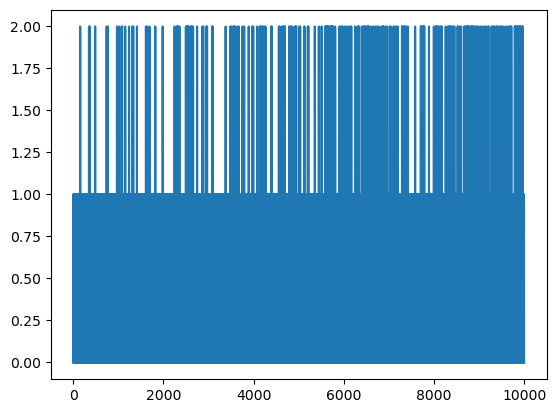

In [91]:
plt.plot(bs[:10000])

In [92]:
lag = 3
test = (frames[:-lag] * bs[lag:, None, None, None]).sum(axis=0)
test.shape

(127, 203, 3)

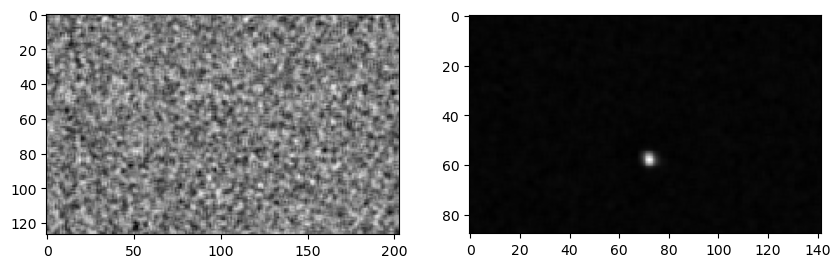

In [94]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(test[:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(ac1.d_spatial_maps[cell_id][:,:,0], cmap='gray')